    Name: Pin Hen Song                            Student ID: 32648308

# Section 1: Specification Table
|    |    |
| :- | :- |
| **Base model**| 10x10 chance-based snakes an ladders board game |
| **Extension assumptions** | Introduce stradegy where every player can roll two dices in each round: one is the number of spaces their own game piece moves, while the other is the number of spaces another player's piece moves, chosen by the player. |
| **Techniques showcased**| Monte Carlo & Markov chain & Game Theory |
| **Question 1**  | What are the effect of snakes and ladders on expected turns to finish game |
| **Question 2** | What are the payoff and Nash equilibrium? |

# Setion 2: Introduction

## Base Model
Snake and Ladder is a stochastic board game played on a 10x10 square grid. Each player starts at square 1 (index 0) and takes turns rolling a dice to determine their movement. The board contains snakes and ladders that can either assist players in advancing or hinder their progress. The objective is to be the first player to reach or exceed the final square.

## Extensions
The model is extended to allow each player to roll two dice in each round. The active player selects one die to move their game piece forward and can use the remaining die to move another player's game piece. This modification introduces strategic decision-making into the game. The model is further simplified by considering only two players.

## Modelling Questions
###  Modelling Question 1a: Effect of Number of Snakes and Ladders on Game Duration
The impact of the number of snakes and ladders on the duration of the game is analyzed using Monte Carlo simulations and Markov Chain. First, multiple board configurations meeting the specified criteria (number of snakes and ladders) are created. Then, the average number of turns required to complete the game is calculated through Monte Carlo iterations or by determining the absorption time using Markov Chain.

### Modelling Question 1b: Effect of Maximum Length of Snakes and Ladders on Game Duration:
Similar to the previous problem, the impact of the maximum length of snakes and ladders on the game duration is explored. However, in each iteration, the maximum length of snakes and ladders is altered. The average turns required to finish the game are determined using methods such as Monte Carlo simulation.

### Modelling Question 2a: Player Payouts with Different Strategies:
The payout or rewards of players utilizing different strategies are evaluated. Three self-benefiting strategies are employed, and their details are explained in the model description. The payout of players can be estimated using Monte Carlo simulations, which involve multiple iterations of game plays.

### Modelling Question 2b: Nash Equilibrium
The concept of Nash Equilibrium, a solution concept in game theory, can be applied to analyze the strategy in the Snake and Ladder game, where both player maximize their winning rate.

# Section 3: Model Description

The Snake and Ladder game is a stochastic system with discrete time, which can be simulated using both numerical methods (Monte Carlo simulation) and analytical methods (Markov Chain analysis).

## Assumptions
- The game involves two players.
- There are two fair six-sided dice.
- The game board consists of 100 squares.


## Game Rules 
1. Each player starts on square one.
2. In each round, both players roll two dice.
3. The player whose turn it is chooses one of the dice and moves their game piece forward by the number indicated on that die; while the opponent move their game piece forward by the number indicated on the remaining die.
4. If a player lands on the head of a snake, they move to the corresponding tail of that snake.
5. If a player lands at the bottom of a ladder, they move to the corresponding top of that ladder.
6. If both players reach or pass square 100 in the same round, the game ends in a draw. Otherwise, the first player to reach or pass square 100 wins.

## Board Settings Rules
1. A snake's head does not occupy the same square as any other snake's head, snake's tail, ladder's top, or ladder's bottom.
2. A ladder's bottom does not occupy the same square as any other ladder's top, ladder's bottom, snake's head, or snake's tail.
3. The range of ladder indices is 1 to 99 (from ladder bottom to ladder top).
4. The range of snake indices is 0 to 98 (from snake tail to snake head).

## Strategies
There are three strategies that a player can employ:

- **Strategy 1:** The player chooses the dice that allows them to move the most steps. In this strategy, the player compares the number of steps they would move with each dice and selects the one with the larger value.
- **Strategy 2:** The player chooses the dice that causes the opponent to move the fewest steps. Here, the player compares the number of steps the opponent would move with each dice and selects the one with the smaller value.
- **Strategy 3:** The player selects the dice that maximizes the distance between themselves and the opponent if they are ahead or minimizes the distance if they are behind. This strategy involves comparing the difference in steps between the player and the opponent (player's move minus opponent's move) for each available dice and choosing the one that with larger difference.

**Example**: For example, the player chooses dice 1, they would move 6 steps while the opponent would move 20 steps. On the other hand, if the player chooses dice 2, they would move 4 steps while the opponent would move 10 steps.

|          | player |opponent|
|    :-    |   :-   |   :-   |
|**dice 1**|   15   |   20   |
|**dice 2**|   10   |   8    |

If the player employ,<br>

- **Strategy 1:** The player will choose dice 1 since it allows them to move 15 steps, which is more than choosing dice 2, which only moves 10 steps.
- **Strategy 2:** The player will choose dice 2 because it causes the opponent to move 8 steps, which is fewer than choosing dice 1, where the opponent would move 20 steps.
- **Strategy 3:** The player will choose dice 2 as it results in a change of 2 steps between the player and the opponent. By choosing dice 1, the change would be -5 steps (15-20). Therefore, dice 2 provides a better outcome in terms of minimizing the gap or getting closer to the opponent.

** note that number of rolled dice and resulting moves can be vary due to the presence of snakes and ladders 

## Methodology

### Simulation of turns taken finishing a game with Monte Carlo 
1. generate *n* number of boards with different combination but same number and posibble maximum length of snakes and ladder each
2. play each board *m* times
3. calculate the mean of turns taken to finish a snake and ladder game 

```
FOR each number of new boards:
    FOR each game play iteration:
        cumulate turn to finish the board
return mean of turns to finish boards
```

### Simulation of turns taken finishing a game with Markov Chain
1. generate *n* number of boards with different combination but same number and posibble maximum length of snakes and ladder each
2. generate transition matrix for each board 
3. calculate absorbing time
3. calculate the mean of turns taken to finish a snake and ladder game 

```
FOR each number of new boards:
    cumulate absorbing time (turn to finish game)
return mean of absorbing time
```

** note that strategy is not introduced while simulating turns taken finishing game 

### Simulation of Payout with Monte Carlo
1. player 1 and player 2 choose a strategy 
2. generate *n* number of boards with different combination but same number and posibble maximum length of snakes and ladder each
3. play each board *m* times
4. calculate the mean of turns taken to finish a snake and ladder game 

```
FOR each combination of strategy:
    FOR each number of new boards:
        FOR each game play iteration:
            cumulate win-rate
return win-rate
```

# Section 4: Source Code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from tqdm.notebook import tqdm_notebook
import nashpy as nash
import copy

## Board Generator
`Board` class generate list of snakes and ladders; and roll dice

In [2]:
class Board: 
    
    def __init__(self, snake_count, snake_len, ladder_count, ladder_len):
        """
        snake_count: number of snakes in the board
        snake_len: possible maximum length of snake
        ladder_count: number of ladders in the board
        ladder_len: possible maximum length of ladder
        """
        self.turns = [] 
        self.snakes = self.snake_generator(snake_count, snake_len) #create snakes
        self.ladders = self.ladder_generator(ladder_count, ladder_len) #create ladders

        
    def snake_generator(self, snake_count, snake_len, square_count = 100):
        """
        return list of two list, index of snake head and index of snake tail 
        
        snake_count: number of snakes in the board
        snake_len: possible maximum length of snake
        """
        snakes  = [[],[]] # [[snake head],[snake tail]]
        for _ in range(snake_count):
            
            #snake head
            snake_head = np.random.randint(1,square_count-1) #max value of snake head is index 98
            while snake_head in snakes[0]: #a square can't have more than one snake head 
                snake_head = np.random.randint(1, square_count-1)
            snakes[0].append(snake_head)

            #snake tail
            snake_tail = max(snake_head - np.random.randint(1, snake_len), 0)
            while snake_tail in snakes[0]: #snake tail and snake head can't share the same square
                snake_tail = max(snake_head - np.random.randint(1, snake_len), 0)
            snakes[1].append(snake_tail)
            
        return snakes


    def ladder_generator(self, ladder_count, ladder_len, square_count = 100):
        """
        return list of two list, index of ladder bottom and ladder top
        
        ladder_count: number of ladders in the board
        ladder_len: possible maximum length of ladder
        """
        ladders = [[],[]] # [[ladder bottom],[ladder top]]
        for _ in range(ladder_count):
            
            #ladder bottom
            ladder_bottom = np.random.randint(1,square_count-1) #max index of ladder bottom is 98
            #ladder bottom can't occupy the same square with snake head, ladders bottom and snake tail
            while ladder_bottom in self.snakes[0] or ladder_bottom in ladders[0] or ladder_bottom in self.snakes[1]:
                ladder_bottom = np.random.randint(1,square_count-1)
            ladders[0].append(ladder_bottom)
            
            #ladder top
            ladder_top= min(ladder_bottom + np.random.randint(1,ladder_len), square_count-1) #max index of ladder top is 99
            #ladder top can't occupy the same square with snake head and ladder bottom
            while ladder_top in self.snakes[0] or ladder_top in ladders[0]: 
                ladder_top = min(ladder_bottom + np.random.randint(1,ladder_len), square_count-1)
            ladders[1].append(ladder_top)
        return ladders
            
    def roll_dice(self):
        return np.random.randint(1,7)

## Monte Carlo
`Game_Monte_Carlo` class utilizes Monte Carlo method to simulate snake and ladder game.

In [3]:
class Game_Monte_Carlo(Board): 
    
    def __init__(self, snake_count, snake_len, ladder_count, ladder_len, rounds=150):
        super().__init__(snake_count, snake_len, ladder_count, ladder_len)
        self.mean = self.play_game(rounds) #mean of turns to finish the board game

    def move(self, state):
        """
        return state of player after moving 
        
        state: current state of player    
        """
        state = state + self.roll_dice() + self.roll_dice()
        if state in self.snakes[0]:
            state = self.snakes[1][self.snakes[0].index(state)] #eaten by snake
        elif state in self.ladders[0]:
            state = self.ladders[1][self.ladders[0].index(state)] #climb ladder
        return state

    def play_game(self, rounds):
        """
        game play iteration 
        
        rounds: round to iterate 
        """
        turns = np.array([])
        for _ in range(rounds):
            state, turn = 0, 0
            while state <= 99:
                state = self.move(state)
                turn += 1
            turns= np.append(turns, turn)
        return np.mean(turns)

def monte_carlo(params, variable, var_range, board_count=100, rounds=150):
    """
    return statistic of a game with certain settings 
    
    params: parameters of board
    variable: game settings to chage, e.g snake_len, snake_count, etc
    var_range: range of game settings
    board_count: number of board to create
    rounds: iteration for each board
    """
    mean, std_dev = [], []
    for val in var_range:
        params[variable] = val
        turns = np.array([])
        for i in range(board_count): #create new game (new snake and ladder)
            board = Game_Monte_Carlo(**params, rounds = rounds) #new boards
            turns = np.append(board.mean, turns)
        mean.append(np.mean(turns))
        std_dev.append(np.std(turns))
    return(var_range, mean, std_dev)

## Markov Chain
`Game_Markov` class utilizes Markov Chain to simulate snake and ladder game.

In [4]:
class Game_Markov(Board):
    #probability of two dice (0 to 12)
    prob_dice = [0, 0, 1/36, 2/36, 3/36, 4/36, 5/36, 6/36, 5/36, 4/36, 3/36, 2/36, 1/36]
    n = 100 #size of board
    
    def __init__(self, snake_count, snake_len, ladder_count, ladder_len):
        super().__init__(snake_count, snake_len, ladder_count, ladder_len) #create snakes and ladders
        self.trn = 97 #number transient state
        self.all_one = np.ones((self.trn,1)) # all-one matrix 
        
        self.M = self.trans_matrix() #M, transition matrix
        
        #Components of Canonical form Markov Chain matrix
        self.Q = self.M[:self.trn,:self.trn] # Q
        self.R  = self.M[:self.trn,self.trn:] # R
        self.I = np.eye(self.trn) # I, identity matrix
        
        self.N = np.linalg.inv((self.I-self.Q)) #fundamental matrix, N = (I-Q)^-1 
        self.t = self.N.dot(self.all_one)# absorption time, t = N ∙ all-one matrix
        self.B = self.N.dot(self.R) # absorption probability, B = N ∙ R
        
        self.turn = self.t[1][0] #average turn taken if start from square 0
        
    def trans_matrix(self):
        """
        return transition matrix
        """
        n = self.n
        M = np.zeros([n, n]) #transition matrix
        
        #transient states
        for i in range(n):
            k = min(len(self.prob_dice), n-i)
            M[i, i:i+k] = self.prob_dice[0:k]
            M[i, i+k-1] += np.sum(self.prob_dice[k:]) #exceed 
        
        #snakes 
        for i in range(len(self.snakes[0])):
            snake_head, snake_tail = self.snakes[0][i], self.snakes[1][i]
            M[:,snake_tail] += M[:,snake_head] #settle tail
            M[:,snake_head] = 0 #settle head
        
        #ladders
        for i in range(len(self.ladders[0])):
            ladder_bottom, ladder_top = self.ladders[0][i], self.ladders[1][i]
            M[:,ladder_top] += M[:,ladder_bottom] #settle top
            M[:,ladder_bottom] = 0 #settle bottom
            
        return M

def markov_chain(params, variable, var_range, board_count=100):
    """
    return absorption time if start from square 0
    
    params: parameters of game 
    variable: game settings to chage, e.g snake_len, snake_count, etc
    var_range: range of game settings
    """
    turn_lst = [] # number of turns required to complete different boards with different cobination 
    for var in var_range:
        params[variable] = var
        round_lst = np.array([])
        for _ in range(board_count): 
            board = Game_Markov(**params) #new board
            round_lst = np.append(round_lst, board.turn) #number of turns required to complete the board
        turn_lst.append(np.mean(round_lst)) 
    return (var_range, turn_lst)


## Game Theory

`Payoff` class utilizes Monte Carlo method to calculate the payoff of two players playing Snake and Ladder game with strategies.

In [5]:
class Payoff(Board): 
    
    def __init__(self, snake_count, snake_len, ladder_count, ladder_len):
        super().__init__(snake_count, snake_len, ladder_count, ladder_len)

    def move(self, ply, opp, ply_strat):
        """
        return next state of player if paying with ply_strat
        
        ply: state of player
        opp: state of opponent
        ply_strat: strategy of player (0 to 3)
        """
        dices = [self.roll_dice(), self.roll_dice()] #two dice
        ply_moves = [self.move_dice(ply, dice) for dice in dices] #possible moves of player
        opp_moves = [self.move_dice(opp, dice) for dice in dices] #possible moves of opposition
         
        if ply_strat == 0: 
            next_state = self.strat_1(ply, opp, ply_moves, opp_moves) #play strategy 1
        elif ply_strat == 1: 
            next_state = self.strat_2(ply, opp, ply_moves, opp_moves) #play strategy 2
        elif ply_strat == 2: 
            next_state = self.strat_3(ply, opp, ply_moves, opp_moves) #play strategy 3
            
        return next_state
    
    def move_dice(self, state, dice):
        """
        return state of player after moving the amount of the dice
        
        dice: amount of dice
        state: state of the player
        """
        state = state + dice
        if state in self.snakes[0]:
            state = self.snakes[1][self.snakes[0].index(state)] #eaten by snake
        elif state in self.ladders[0]:
            state = self.ladders[1][self.ladders[0].index(state)] #climb ladder
        return state
    

    def play_game(self, p1_strat, p2_strat):
        """
        append turns taken to finish the game to self.turns
        
        p1_strat: strategy of player1
        p2_strat: strategy of player2
        """
        turn, p1, p2 = 0, 0, 0
        while p1 < 99 and p2 < 99: #new round/turn
            p1, p2 = self.move(p1, p2, p1_strat) #p1 turn
            p2, p1 = self.move(p2, p1, p2_strat) #p2 turn
            turn += 1
            
        #result
        res = 0 # p2 win
        if p1 >=99 and p2 >= 99: #draw
            res = 0.5
        elif p1 >= 99: # p1 win
            res = 1
        self.turns.append(res) 
        
    def strat_1(self, ply, opp, ply_moves, opp_moves):
        """
        return the states of player and opponent after implementing strategy 1
        
        ply: current state of player
        opp: current state of opposition
        ply_moves: possible moves of player
        opp_moves: possible moves of opposition
        """
        
        if (ply_moves[0]-ply) > (ply_moves[1]-ply): #if player choose dice 1 make the player move more
            next_ply, next_opp = ply_moves[0], opp_moves[1]
        else:
            next_ply, next_opp = ply_moves[1], opp_moves[0]
        return next_ply, next_opp
        
    
    def strat_2(self, ply, opp, ply_moves, opp_moves):
        """
        return the states of player and opponent after implementing strategy 2
        
        ply: current state of player
        opp: current state of opposition
        ply_moves: possible moves of player
        opp_moves: possible moves of opposition
        """
        if (opp_moves[1]-opp) < (opp_moves[0]-opp): #if player choose dice 1 make opponent move less
            next_ply, next_opp = ply_moves[0], opp_moves[1]
        else:
            next_ply, next_opp = ply_moves[1], opp_moves[0]
        return next_ply, next_opp

    def strat_3(self, ply, opp, ply_moves, opp_moves):
        """
        return the states of player and opponent after implementing strategy 3
        
        ply: current state of player
        opp: current state of opposition
        ply_moves: possible moves of player
        opp_moves: possible moves of opposition
        """
        if (ply_moves[0]-opp_moves[1]) > (ply_moves[1]-opp_moves[0]):  
            next_ply, next_opp = ply_moves[0], opp_moves[1]
        else:
            next_ply, next_opp = ply_moves[1], opp_moves[0]
        return next_ply, next_opp
    

def payoff(snake_count, snake_len, ladder_count, ladder_len, p1_strat, p2_strat, board_count=100, rounds=250):
    """
    return payoff
    
    p1_strat: player 1 strategy
    p2_strat: player 2 strategy
    board_count: number of board (different snakes and ladders) created
    rounds: number of rounds played for each new board
    """
    prob_p1_lst = np.array([])
    for i in range(board_count): #create new game (new snake and ladder)
        board = Payoff(snake_count, snake_len, ladder_count, ladder_len) #new board
        rounds_lst = np.array([])
        for _ in range(rounds): 
            board.play_game(p1_strat, p2_strat) #replay game
        prob_p1_lst = np.append(prob_p1_lst, [board.turns.count(0)/rounds])
    return np.mean(prob_p1_lst)

# Section 5: Result 

In [6]:
# variables
var = ["snake_count", "ladder_count", "snake_len", "ladder_len"]

# range of number of snakes & ladders
count_start, count_end, count_step = 0, 21, 2 
count_range  = range(count_start, count_end, count_step) 

# range of possible length of snakes & ladders
len_start, len_end, len_step = 10, 101, 10
len_range = range(len_start, len_end, len_step)

# range of each variables in a list 
var_range = [count_range, count_range, len_range, len_range]

**Markov Chain**

In [7]:
# simulate game with markov chain
res_markov = []
print("Markov Chain Simulaton Progress Bar:")
for i in tqdm_notebook(range(len(var))):
    params = {"snake_count": 10, "snake_len": 50, "ladder_count": 10, "ladder_len": 50}
    res_markov.append(markov_chain(params, var[i], var_range[i], board_count = 150))

Markov Chain Simulaton Progress Bar:


  0%|          | 0/4 [00:00<?, ?it/s]

**Monte Carlo**

In [8]:
#simulate game with monte carlo
print("Monte Carlo Simulation Progress Bar:")
res_monte = []
for i in tqdm_notebook(range(len(var))):
    params = {"snake_count": 10, "snake_len": 50, "ladder_count": 10, "ladder_len": 50}
    res_monte.append(monte_carlo(params, var[i], var_range[i]))


Monte Carlo Simulation Progress Bar:


  0%|          | 0/4 [00:00<?, ?it/s]

**Compare**

Text(0.5, 0.98, 'Average Number of Turns to Finish the Snake & Ladder Game under Various Settings \n where the default setting is {snake_count: 10, snake_len: 50, ladder_count: 10, ladder_len: 50}')

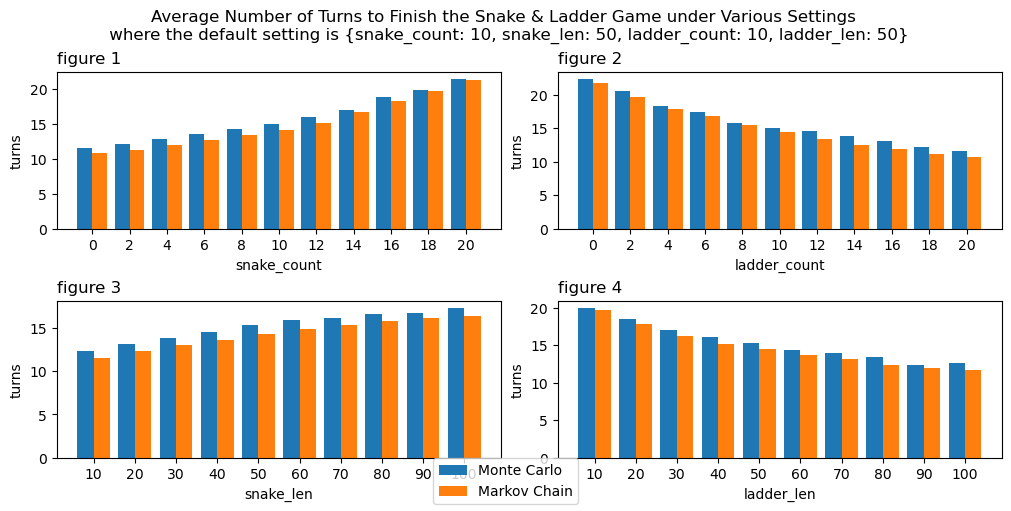

In [9]:
#plot result 
fig, axs = plt.subplots(2, 2, constrained_layout = True)

var_range_str = [list(map(str, i)) for i in var_range]
width, gap = 0.5, 0.1

r = [np.arange((count_end - count_start)// count_step +1), np.arange((len_end - len_start)// len_step + 1)]

for i in range(len(var)):
    axs[i//2,i%2].bar(r[i//2] - width/2 + gap/2, res_monte[i][1], width=width-gap)
    axs[i//2,i%2].bar(r[i//2] + width/2 - gap/2, res_markov[i][1], width=width-gap)
    #print(pd.DataFrame({"turns":res_monte[i][1]}, index = res_monte[i][0]))
    #print(pd.DataFrame({"turns":res_markov[i][1]}, index = res_markov[i][0]))
    
    axs[i//2,i%2].set_xlabel(var[i])
    axs[i//2,i%2].set_ylabel('turns')
    axs[i//2,i%2].set_xticks(r[i//2], var_range_str[i])
    axs[i//2,i%2].set_title('figure {}'.format(i+1), loc='left')
    
    
fig.set_figheight(5)
fig.set_figwidth(10)
fig.legend(['Monte Carlo', 'Markov Chain'], loc=8)
fig.suptitle('Average Number of Turns to Finish the Snake & Ladder Game under Various Settings \n where the default setting is {snake_count: 10, snake_len: 50, ladder_count: 10, ladder_len: 50}')

From the result we can observe that 
- *Figure 1,* when the number snakes increase, the expected number of turns needed to complete the game increase 
- *Figure 2,* when the number ladder increase, the expected number of turns needed to complete the game decreases
- *Figure 3,* when possible maximum length of snake increase, the expected number of turns needed to complete the game increase 
- *Figure 4,* when possible maximum length of ladder increase, the expected number of turns needed to complete the game decrease 

**Payoff**

In [10]:
s = 3 #number of strategy
np.random.seed(0)
payoff_mtx = np.zeros([s, s])

for i in tqdm_notebook(range(s**2)): 
    params = {"snake_count": 10, "snake_len": 75, "ladder_count": 10, "ladder_len": 75}
    payoff_mtx[i//s,i%s] = round(payoff(**params, p1_strat=(i//s), p2_strat=(i%s)),2)

print('player 1 payoff: \n', payoff_mtx,'\n')
print('player 2 payoff: \n', 1 - payoff_mtx)

  0%|          | 0/9 [00:00<?, ?it/s]

player 1 payoff: 
 [[0.45 0.49 0.56]
 [0.43 0.48 0.6 ]
 [0.33 0.35 0.47]] 

player 2 payoff: 
 [[0.55 0.51 0.44]
 [0.57 0.52 0.4 ]
 [0.67 0.65 0.53]]


**Nash Equilibrium**

In [11]:
game = nash.Game(payoff_mtx, 1-payoff_mtx)
equilibria = game.support_enumeration()
list(equilibria)

[(array([1., 0., 0.]), array([1., 0., 0.]))]

It is a Pure Nash Equilibrium, which both players are playing the same pure strategy, where they choose the first strategy exclusively. Neither player has an incentive to unilaterally deviate from their chosen strategy since it is already optimal given the strategies of the other player.

# Section 6: List of algorithms and concepts

## Monte Carlo 
**Estimating Probabilities:** Monte Carlo methods is used to estimate the probabilities of various events in the game. For example,  multiple games is simulated using random dice rolls and track how many turn does it take to finish a game. By repeating this simulation many times, average turns taken to finish a board is obtained. 

**Evaluating Payoff of Strategies:** Monte Carlo methods is used to evaluate different strategies in the game. Multiple games are simulated, where each game represents a different strategy being employed. With the outcomes of these simulations which is the probability of winning (payoff), the strategies can be assessed with game theory.
    
## Markov Chain 
**State:** Each state in the Markov Chain represents a specific square on the game board. I

**Transition Probability:** The transition probabilities in the Markov Chain represent the chances of moving from one state (position) to another. In the Snake and Ladder game, these probabilities depend on the outcome of rolling the dice and the rules of the game. For example, the probability of moving from one position to another is determined by the numbers on the dice and the presence of snakes or ladders on the board.

**Markov Property:** The Markov property applies to the Snake and Ladder game as the probability of transitioning to a future state depends only on the current state. In other words, the future positions of the players depend solely on their current positions and the result of the dice roll, without considering their previous moves.

**Transition Matrix:** The transition matrix of the Markov Chain in the Snake and Ladder game represents the probabilities of moving from one position to another. Each element in the matrix corresponds to the probability of transitioning from one state (position) to another state.
Absorbing time: The expected number of moves it takes for a player to finish the game from a given starting point.
    
## Game Theory 
**Players:** There are two players who take turns rolling the dice and moving their respective chess pieces on the board. 

**Strategies:** Each player selects a strategy, which involves choosing one of two rolled dice to be thier move, while the remanining is the opponent's move. The strategy are maximize their own progress or block the opponent's progress.

**Payoffs:** The payoffs in the Snake and Ladder game could be defined as the probability of reaching the board 

**Nash Equilibrium:** In the Snake and Ladder game, a Nash equilibrium represents a combination of strategies where neither player has an incentive to change their strategy unilaterally. It could correspond to a situation where both players are playing optimally, given the other player's moves and the outcomes of their dice rolls.
